In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp
plt.rcParams['figure.figsize'] = (12, 7)

In [25]:
POINTS_COUNT = 10
x = np.random.rand(POINTS_COUNT)
y = np.random.rand(POINTS_COUNT)
x, y

(array([0.03598704, 0.02464958, 0.27436846, 0.74273747, 0.02469919,
        0.7863878 , 0.83041991, 0.96675136, 0.4253162 , 0.52806689]),
 array([0.53424051, 0.12719847, 0.98819972, 0.34170954, 0.28093364,
        0.33597926, 0.29308242, 0.55305393, 0.51566054, 0.30689254]))

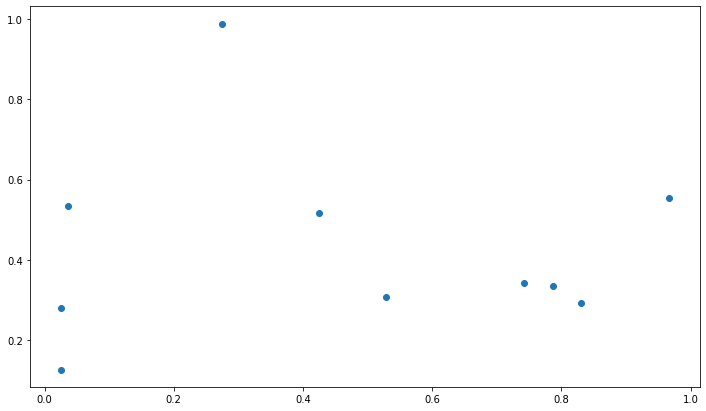

In [26]:
plt.plot(x, y, 'o')
plt.show()

In [27]:
f = sp.interpolate.interp1d(x, y, kind="cubic")

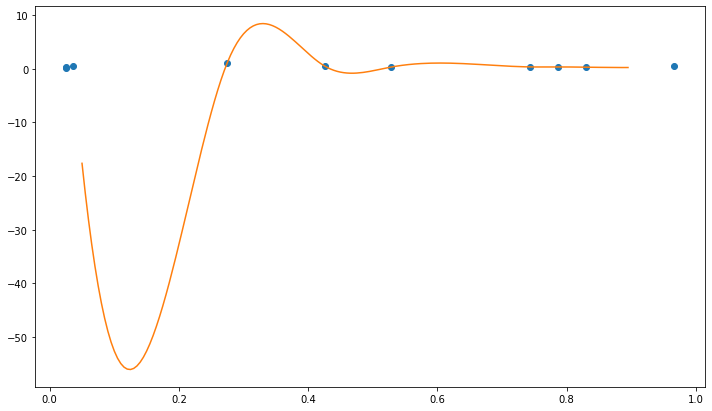

In [28]:
plt.plot(x, y, 'o')
x_plot = np.arange(0.05, 0.90, 0.005)
y_plot = f(x_plot)
plt.plot(x_plot, y_plot, '-')
plt.show()

https://github.com/scipy/scipy/blob/3ff203b028b135294143025015ee7cd63f5facf8/scipy/interpolate/interpolate.py#L341
https://github.com/scipy/scipy/blob/3ff203b028b135294143025015ee7cd63f5facf8/scipy/interpolate/_bsplines.py#L1090

In [29]:
f1 = sp.interpolate.lagrange(x, y)

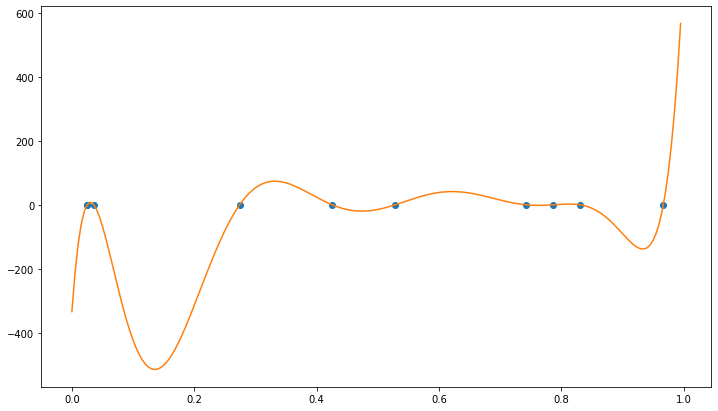

In [30]:
plt.plot(x, y, 'o')
x_plot = np.arange(0.0, 1.0, 0.005)
y_plot = f1(x_plot)
plt.plot(x_plot, y_plot, '-')
plt.show()

In [31]:
def lagrange(x: np.ndarray, y: np.ndarray):
    n = len(x)
    basis_polynomial_divisors = np.empty((n, ), dtype=np.float64)

    for i in range(n):
        _divisors_vector = np.subtract(x[i], x)
        _divisors_vector[i] = 1
        basis_polynomial_divisors[i] = _divisors_vector.prod()

    def _interpolation(x_):
        L = np.empty((n, ), dtype=np.float64)
        for i in range(n):
            coefs_vector = np.subtract(x_, x)
            coefs_vector[i] = 1
            L[i] = np.divide(coefs_vector.prod(), basis_polynomial_divisors[i])
        return np.sum(np.multiply(y, L))

    return np.vectorize(_interpolation)

In [32]:
f2 = lagrange(x, y)

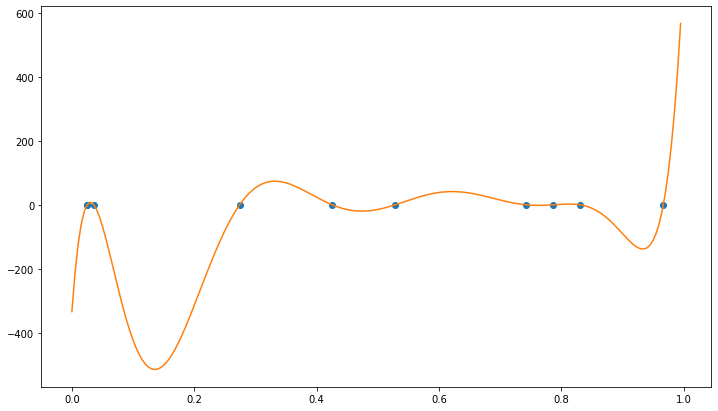

In [33]:
plt.plot(x, y, 'o')
x_plot = np.arange(0.0, 1.0, 0.005)
y_plot = f2(x_plot)
plt.plot(x_plot, y_plot, '-')
plt.show()

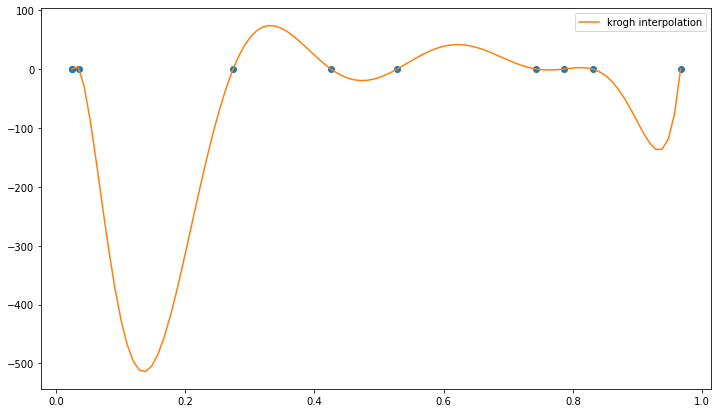

In [42]:
x_int = np.linspace(min(x), max(x), num=100)
y_int = sp.interpolate.krogh_interpolate(x, y, xd)
plt.plot(x, y, "o")
plt.plot(x_int, y_int, label="krogh interpolation")
plt.legend()
plt.show()